In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
train_dir =  '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/train'

validation_dir =  '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/validation'

test_dir =  '/home/starflyyy/Deep learning/Dog_vs_cats/split_into_train_vali_test/test'

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1. / 255, 
                                   rotation_range = 40,
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 16000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(train_generator, steps_per_epoch = 400, epochs = 100, validation_data = validation_generator, validation_steps = 125)
model.save('cats_and_dogs_small_2.h5')


Epoch 1/100
400/400 [==============================] - 59s 148ms/step - loss: 0.6815 - acc: 0.5543 - val_loss: 0.6661 - val_acc: 0.6447
Epoch 2/100
400/400 [==============================] - 63s 158ms/step - loss: 0.6472 - acc: 0.6242 - val_loss: 0.4997 - val_acc: 0.6673
Epoch 3/100
400/400 [==============================] - 67s 167ms/step - loss: 0.6106 - acc: 0.6677 - val_loss: 0.5637 - val_acc: 0.7062
Epoch 4/100
400/400 [==============================] - 64s 160ms/step - loss: 0.5937 - acc: 0.6786 - val_loss: 0.4433 - val_acc: 0.7306
Epoch 5/100
400/400 [==============================] - 64s 159ms/step - loss: 0.5700 - acc: 0.7006 - val_loss: 0.6243 - val_acc: 0.7615
Epoch 6/100
400/400 [==============================] - 65s 161ms/step - loss: 0.5566 - acc: 0.7141 - val_loss: 0.5035 - val_acc: 0.7638
Epoch 7/100
400/400 [==============================] - 65s 162ms/step - loss: 0.5434 - acc: 0.7229 - val_loss: 0.5316 - val_acc: 0.7329
Epoch 8/100
400/400 [==========================

400/400 [==============================] - 59s 148ms/step - loss: 0.3100 - acc: 0.8680 - val_loss: 0.5181 - val_acc: 0.9090
Epoch 60/100
400/400 [==============================] - 59s 148ms/step - loss: 0.2944 - acc: 0.8771 - val_loss: 0.2017 - val_acc: 0.8853
Epoch 61/100
400/400 [==============================] - 58s 146ms/step - loss: 0.3022 - acc: 0.8690 - val_loss: 0.1020 - val_acc: 0.9077
Epoch 62/100
400/400 [==============================] - 61s 152ms/step - loss: 0.3068 - acc: 0.8691 - val_loss: 0.5173 - val_acc: 0.8893
Epoch 63/100
400/400 [==============================] - 59s 147ms/step - loss: 0.2902 - acc: 0.8766 - val_loss: 0.1642 - val_acc: 0.8755
Epoch 64/100
400/400 [==============================] - 58s 145ms/step - loss: 0.2849 - acc: 0.8820 - val_loss: 0.5209 - val_acc: 0.8932
Epoch 65/100
400/400 [==============================] - 60s 151ms/step - loss: 0.2950 - acc: 0.8727 - val_loss: 0.3263 - val_acc: 0.8936
Epoch 66/100
400/400 [==============================] 

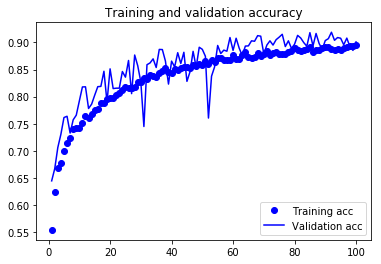

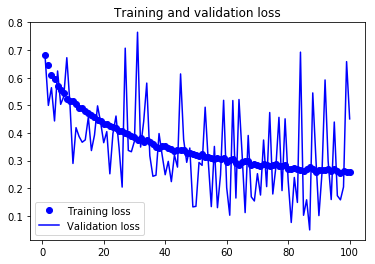

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 101)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()